# Article clustering
This code is used to cluster records retrieved from databases like PubMed, Web of Science, Embase, ScienceDirect etc.
*Clustering* means to group together things that are similar. It is a supervised machine learning (ML) approach based on Natural Language Processing (NLP), which is basically focusing on the analysis of words that we use everyday in their context. 

ML-NLP can be used to identify and cluster records based on the topic that they are discussing. It is important to clarify that NLP is a *linguistic* approach to a *scientific* problem. The computer understands the **topic** of the article, but does not understand the **results**. You can expect to find clustered articles according to *similar topics*, but you can not expect to find clustered artices according to *similar experimental results*. 

The aim of this code is to group huge amounts of information into general subtopics that makes the screening process easier. It does not remove records automatically and it does not suggest relevant records automatically. This has to be done manually. Still, helps to save a lot of time. 

This code can not be considered as a reviewer (PRISMA) as it does not suggest to remove or include any records. It is a **blind** approach, meaning that it is not directed toward any specific term or subtopic. For this same reason, it **does not introduce bias** in the selection process.  


### Importing the required libraries
Python has limited base functions, however the power of this language is that it can be complemented with *libraries*, which are highly specific for different functions. For this code, *SpaCy* is used for NLP; *Pandas* is used for data science and building the objects required by the other libraries; *MatPlotLib*, for making beautiful graphs; *Numpy*, for mathematical purposes; *WordCloud* for making word clouds; and finally, *SKlearn* is used for ML and multivariate analysis.

In [1]:
#General
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from wordcloud import WordCloud

#For k-means clustering
from sklearn.cluster import KMeans

#For hierarchical clustering
import scipy.cluster.hierarchy as sch

#For DBSCAN clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#For LDA Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer



### Language models
Machine Learning works with two datasets: Training and Test. Training dataset *teaches* the computer what it needs to learn and *test* dataset is the actual thing you want to analyze. The great advantage of SpaCy is that it includes extensive pre-trained language models. This means that a training dataset is not required. Again, we have to remember that this is a *linguistic* approach to a *scientific* problem. The computer will understand that words like (blood-device-health-perfussion) are related and can be grouped into the same topic. Basic chemistry terms like functional groups or families of molecules are well understood, but complex terms like IUPAC nomenclature will not be so well accepted, specially in models that are not in english.

Trained models are available in spanish and french, however, they are not as good or as extensive as english. English model is twice the size of the other two. Other languages are available in the spacy web. 


The only thing you need to change in this part is to activate or deactivate using "#" in the language models as you require them. If you activate another model, make sure to replace "nlp" for the correct name (nlpfr for french or nlpes for spanish) in the rest of the code.

In [2]:
#Imports english model
nlp = spacy.load("en_core_web_trf")
#For french, use:
#nlpfr = spacy.load("fr_core_news_sm")
#For spanish, use:
#nlpes = spacy.load("es_core_news_sm")

### Set the working directory
The working directory is the place in the computer where your files are stored. Everything that you import has to be here. Anything that you export will appear here. 

To find it, you can right-click on the file that you want to open and select "properties". Copy-paste the location of the file starting with "C:\\" Do not include the name of the file, only the name of the directory. Make sure to avoid using spaces or unsupported characters

In [3]:
%cd "C:\Users\Braus\OneDrive\Documentos\Escuela\Internship\Literature\SearchEq\"

C:\Users\Braus\OneDrive\Documentos\Escuela\Internship\Literature\SearchEq


### Set the results of the inquiry file

Normally, databases allow to export results directly as a comma separated values (.csv) file. This can be imported with the line below. Activate or deactivate the "encoding" part if required.

In [4]:
df=pd.read_csv("Complete_set_of_articles.csv", encoding='latin-1')

### Text preprocessing
Before being analyzed, text has to be preprocessed to be as clean as possible. This implies first changing the format into *string* which is the name for plain text in python for SpaCy to read it. Then it changes everything into lowercase.
After thatn, it creates another version of the same text with only alphanumeric data (```is_alpha```), no punctuation signs. Removes stopwords (```is_stop```), which are words that are part of the language structure but don't provide any useful information about any topic for example: "for, to, it, as, a". Then, to avoid redundancies, it *lemmatize* the words (```lemma```), which is changing all possible variations of a word into its base form, for example: "tubing, tube, tubular" will be reduced to "tube". 

In [5]:
def preprocess(text):
    doc = nlp(str(text).lower()) 
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

This part chooses the column that will be used to extract the information for clustering (title or abstract). 

Change it between the " " after the = sign accordingly and be careful to write **exactly** the title of the column respecting uppercases and spaces. 

Big inputs can take up to 3 seconds per article. In this case, a ~1,000 article processing took around 30 min.

In [6]:
df["Cleaned_Abstract"] = df["Abstract"].apply(preprocess)

### Machine Learning - Natural Language Processing
As it is well-known, computers only understand 0's and 1's, not words. For this reason, we have to *vectorize* the words, which is creating a specific numerical vector that represents a word. Then, a weighting scheme called term frequency times inverse document frequency (Tf-IDF) is applied. This scheme reduces the relevance of words that are very frequent in the whole corpus of documents and hence, are not very informative. It also enhances the relevance of words that are very frequent within single documents but are not very frequent in the whole corpus, because this words are very specific and provide useful information.  


In [27]:
#converts text into vectors using TF-IDF and stores it in X
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Cleaned_Abstract"])

The problem of using only 0's and 1's to describe complex things like words is that you create a n-dimensional space that is not possible to be represented on human-understanding graphs. In order to have something "lookable", we have to decrease the dimensionality from n-dimensions to only 2. Principal Component Analysis (PCA) is useful for that. It applies a translation of axis by finding the directions that explain the highest amount of variations and reduces the space into that principal components. 

In [28]:
# Dimensionality reduction for visualization applied on X
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

## Choosing the right clustering
There are several options to cluster information. In this code, I explored only two: K-means and Hierarchical Clustering. 

K-means clustering is 

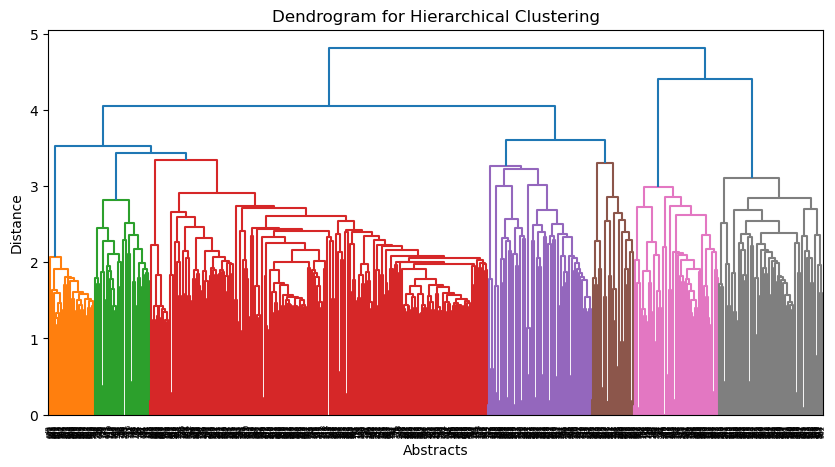

In [29]:
#Plot HC dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X.toarray(), method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Abstracts")
plt.ylabel("Distance")
plt.show()

In [30]:
#K-means clustering
k = 7   # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, df["Cluster_KMeans"])

In [31]:
#Hierarchical clustering
khc=7
hc = AgglomerativeClustering(n_clusters=khc, metric='euclidean', linkage='ward')
df["Cluster_Hierarchical"] = hc.fit_predict(X.toarray())
hierarchical_silhouette = silhouette_score(X, df["Cluster_Hierarchical"])

In [32]:
# Compare Results 
print(f"Silhouette Scores:")
print(f"  - K-Means: {kmeans_silhouette:.3f}")
print(f"  - Hierarchical: {hierarchical_silhouette:.3f}")

Silhouette Scores:
  - K-Means: 0.017
  - Hierarchical: 0.018


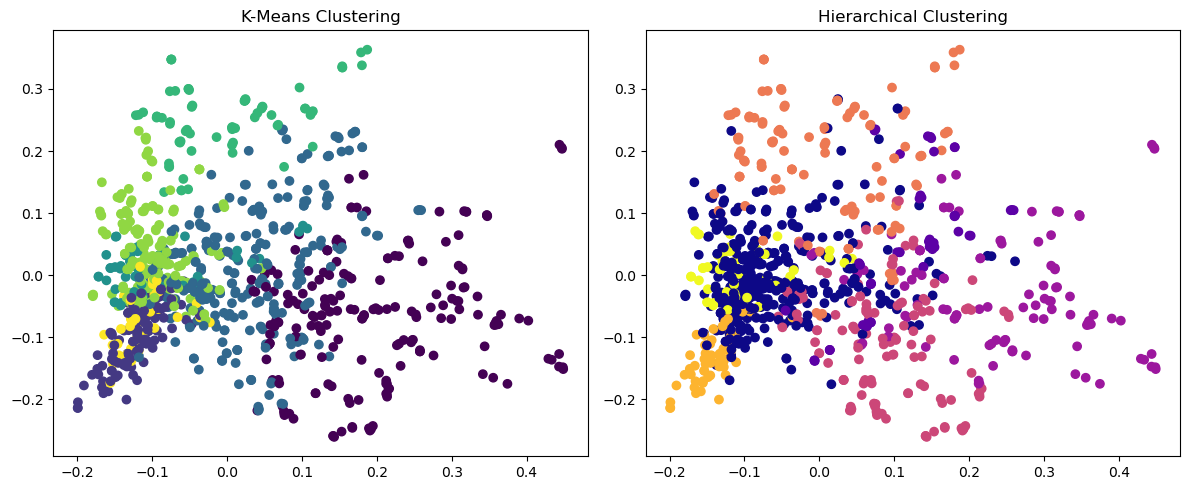

In [33]:
# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df["Cluster_KMeans"], cmap="viridis")
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df["Cluster_Hierarchical"], cmap="plasma")
plt.title("Hierarchical Clustering")

plt.tight_layout()
plt.show()

In [14]:
#Topic Modeling

# Convert text data into a bag-of-words matrix
vectorizer = CountVectorizer(stop_words='english')
Y = vectorizer.fit_transform(df["Cleaned_Abstract"])

# Apply LDA
klda=4 # number of topics
lda = LatentDirichletAllocation(n_components=klda, random_state=42)  
lda.fit(Y)

# Transform articles into topic distributions
topic_distributions = lda.transform(Y)  # X = Bag-of-Words matrix from CountVectorizer

# Create a DataFrame to store results
df_lda_topics = pd.DataFrame(topic_distributions, columns=[f"Topic {i+1}" for i in range(lda.n_components)])

# Assign each article to its most dominant topic
df_lda_topics["Dominant Topic"] = df_lda_topics.idxmax(axis=1)

# Print topic distributions for first few articles
#print(df_lda_topics.head())

#For naming the topics as topic 1, topic 2, etc
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"\nTopic {i+1}: ", [words[j] for j in topic.argsort()[-15:]])  # Top 15 words per topic




Topic 1:  ['patient', 'phthalate', 'day', 'ml', 'concentration', 'cell', 'plasticizer', 'infusion', 'storage', 'study', 'solution', 'bag', 'blood', 'pvc', 'dehp']

Topic 2:  ['dbp', 'sample', 'leach', 'additive', 'mp', 'metabolite', 'chemical', 'concentration', 'study', 'high', 'pvc', 'dehp', 'plastic', 'exposure', 'phthalate']

Topic 3:  ['liquid', 'detection', 'high', 'material', 'determination', 'gc', 'range', 'analysis', 'pvc', 'concentration', 'dehp', 'extraction', 'sample', 'method', 'phthalate']

Topic 4:  ['migration', 'dop', 'increase', 'property', 'extraction', 'result', 'dehp', 'plasticize', 'base', 'material', 'study', 'chloride', 'phthalate', 'plasticizer', 'pvc']


In [34]:
# Define topic labels based on top words. To modify manually
topic_labels = {
    "Topic 1": "migration and extraction",
    "Topic 2": "Coatings and layers",
    "Topic 3": "cyclodextrins",
    "Topic 4": "leaching and blood exposure"
    }

# Map labels to the dominant topic column
df_lda_topics["Dominant Topic"] = df_lda_topics["Dominant Topic"].map(topic_labels)

# Merge with original dataframe containing titles
#df_final = pd.concat([df[["title"]], df[["abstract"]]], axis=1)
#df_final = pd.concat([df_final, df_lda_topics[["Dominant Topic"]]], axis=1)
#df_final = pd.concat([df_final, df[["doi"]]], axis=1)
df_final = pd.concat([df, df_lda_topics[["Dominant Topic"]]], axis=1)

# Print the final dataframe
#print(df_final.head())
df_final.head()

,ï»¿Title,Authors,DOI,Abstract,Cleaned_Abstract,Cluster_KMeans,Cluster_Hierarchical,Dominant Topic
0,Migration of phthalate plasticisers in heritag...,"Bujok S., PaÅczyk T., Szutkowski K., AnioÅ D...",10.1016/j.jenvman.2025.124234,To clean or not to clean? The solution to this...,clean clean solution dilemma relate understand...,2,0,NaN
1,Evaluation of hazardous substances emitted dur...,"Park J., Lee C., Lee M., Jo H., Sohn M., Kim M...",10.1016/j.envint.2025.109296,This study evaluated the inhalation of mask-de...,study evaluate inhalation mask derive material...,2,0,NaN
2,Investigation of interaction mechanism between...,"Yu Y., Wang L., Yu Q., Wu Q., He Y., Cai Z.",10.1016/j.talanta.2024.126942,Phthalate acid esters (PAEs) are a kind of typ...,phthalate acid ester paes kind typical endocri...,3,0,NaN
3,Biodegradation of plasticizers by novel strain...,"Sharma K., Nayarisseri A., Singh S.K.",10.1038/s41598-024-81239-8,Phthalic acid esters are pivotal plasticizers ...,phthalic acid ester pivotal plasticizer applic...,6,0,NaN
4,A low-temperature co-treatment of diethylhexyl...,"Qi Y., Shao W., Xiu F.-R.",10.1016/j.wasman.2024.08.032,As one of the most widespread plastics in the ...,widespread plastic world recycling diethylhexy...,2,0,NaN


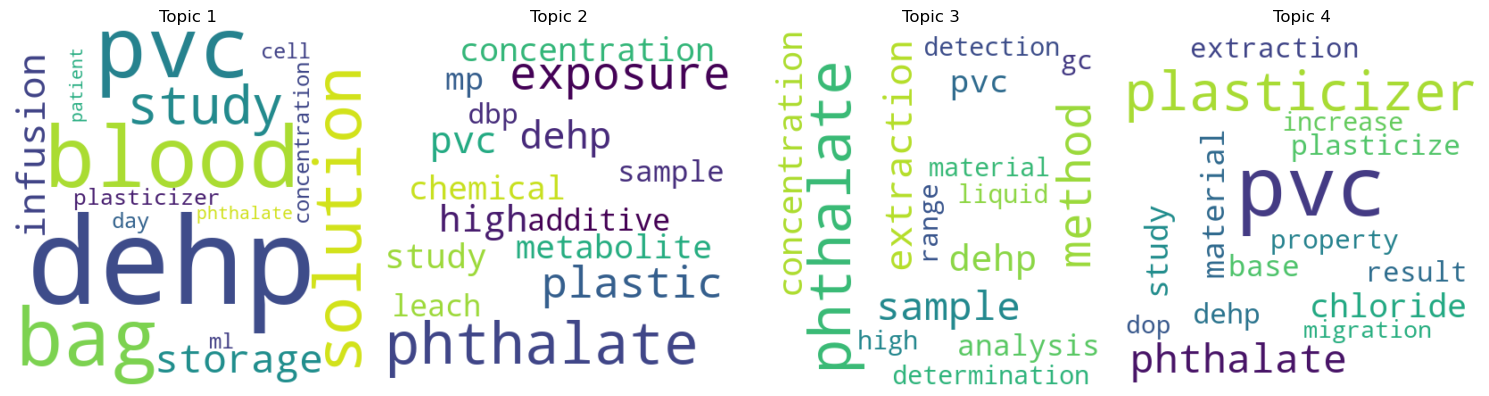

In [16]:
#To plot the data
# Create a subplot for each topic
fig, axes = plt.subplots(1, lda.n_components, figsize=(15, 5))

# Get feature names (words) from the vectorizer
words = vectorizer.get_feature_names_out()

# Generate a word cloud for each topic
for i, topic in enumerate(lda.components_):
    word_freq = {words[j]: topic[j] for j in topic.argsort()[-15:]}  # Top 10 words
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i+1}")

plt.tight_layout()
plt.show()

In [35]:
#To export the data
print(df_final.columns)
#df.head()
df_final.to_csv("Final_clustered_articles.csv", index=False)

Index(['ï»¿Title', 'Authors', 'DOI', 'Abstract', 'Cleaned_Abstract',
       'Cluster_KMeans', 'Cluster_Hierarchical', 'Dominant Topic'],
      dtype='object')
